# CSE185 Lab 6 Report - Code Documentation (10 pts)

* Document any commands used or additional analysis steps below!
* You should include enough detail that the instructors (or your future self) could come back to this several months from now and know exactly what you did and why you did it.
* We will not run this notebook, but will look back to see what you did especially if you end up with different answers.

For grading purposes only - Do not copy or edit this cell!

## Q1

In [58]:
# We had to add the install path to sys.path to get these imports to work
import sys
import os
import matplotlib.pyplot as plt
sys.path.append(os.environ["HOME"]+"/.local/lib/python3.9/site-packages")

# Import the libraries we installed
import scanpy as sc, anndata as ad
import harmonypy
import leidenalg
sc.logging.print_versions()

-----
anndata     0.9.1
scanpy      1.9.3
-----
PIL                 8.3.1
anyio               NA
attr                21.2.0
babel               2.9.1
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
bottleneck          1.3.2
brotli              NA
certifi             2022.12.07
cffi                1.14.6
chardet             4.0.0
charset_normalizer  2.0.0
cloudpickle         1.6.0
colorama            0.4.6
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.06.2
dateutil            2.8.2
debugpy             1.6.7
decorator           5.0.9
defusedxml          0.7.1
entrypoints         0.3
fastjsonschema      NA
fsspec              2021.07.0
google              NA
h5py                3.3.0
harmonypy           NA
idna                3.1
igraph              0.11.4
ipykernel           6.17.1
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              3.0.1
joblib              1.0.

In [3]:
DATADIR=os.environ["HOME"]+"/public/lab6"
dsets = ["GSM5114461_S6_A11", "GSM5114464_S7_D20", "GSM5114474_M3_E7"]
adatas = {}
for ds in dsets:
    print(ds)
    adatas[ds] = sc.read_10x_mtx(DATADIR, prefix=ds+"_", cache=True)
combined = ad.concat(adatas, label="dataset")
combined.obs_names_make_unique()

GSM5114461_S6_A11
GSM5114464_S7_D20
GSM5114474_M3_E7


/opt/conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [4]:
combined

AnnData object with n_obs × n_vars = 12357 × 20621
    obs: 'dataset'

In [5]:
print(adatas["GSM5114461_S6_A11"], adatas["GSM5114464_S7_D20"], adatas["GSM5114474_M3_E7"])

AnnData object with n_obs × n_vars = 4793 × 20621
    var: 'gene_ids', 'feature_types' AnnData object with n_obs × n_vars = 4910 × 20621
    var: 'gene_ids', 'feature_types' AnnData object with n_obs × n_vars = 2654 × 20621
    var: 'gene_ids', 'feature_types'


In [7]:
adatas["GSM5114461_S6_A11"].shape

(4793, 20621)

In [9]:
adatas["GSM5114464_S7_D20"].shape

(4910, 20621)

In [10]:
adatas["GSM5114474_M3_E7"].shape

(2654, 20621)

## Q2

In [13]:
sc.pp.filter_cells(combined, min_genes=200)
sc.pp.filter_cells(combined, min_counts=1000)
sc.pp.filter_genes(combined, min_cells=5)
sc.pp.filter_genes(combined, min_counts=15)

In [15]:
combined

AnnData object with n_obs × n_vars = 10133 × 15779
    obs: 'dataset', 'n_genes', 'n_counts'
    var: 'n_cells', 'n_counts'

## Q3

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


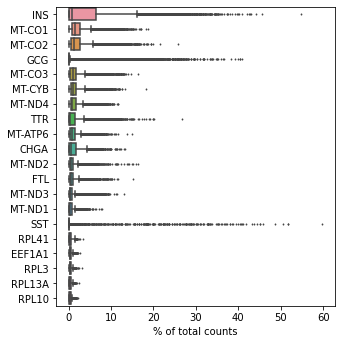

In [16]:
sc.pl.highest_expr_genes(combined, n_top=20)

In [38]:
combined.var['mt'] = combined.var_names.str.startswith('MT-') 
sc.pp.calculate_qc_metrics(combined, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

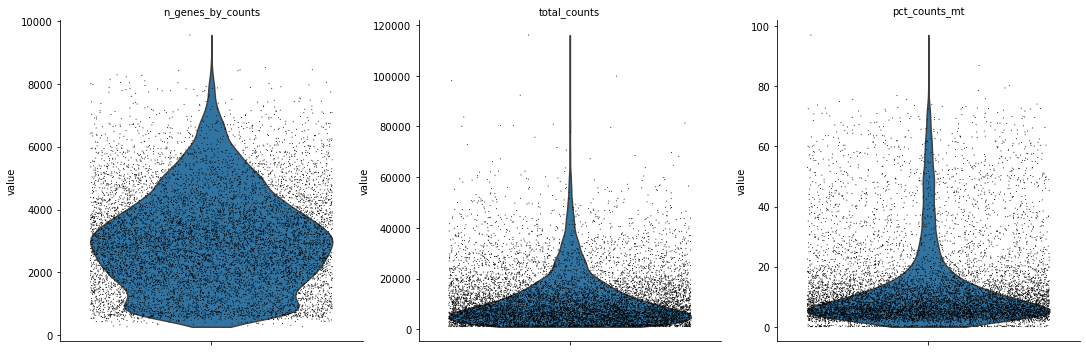

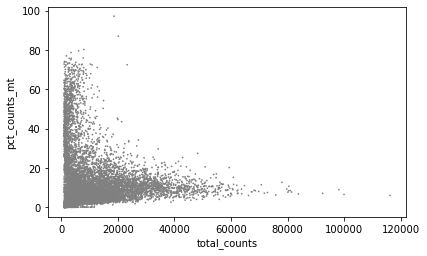

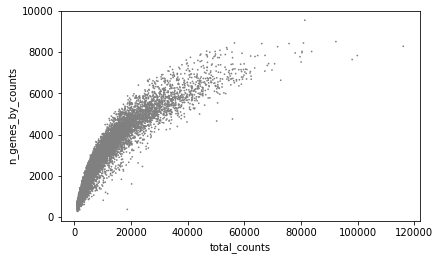

In [74]:
sc.pl.violin(combined, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True, save='unfiltered_qc_violin_plots.png')

sc.pl.scatter(combined, x='total_counts', y='pct_counts_mt', save='unfiltered_qc_scatter_plot_pct_mt.png')

sc.pl.scatter(combined, x='total_counts', y='n_genes_by_counts', save='unfiltered_qc_scatter_plot_n_genes.png')

In [68]:
# adata_filt = combined[combined.obs['pct_counts_mt'] < 25, :]
adata_filt = combined[combined.obs.pct_counts_mt < 25, :]

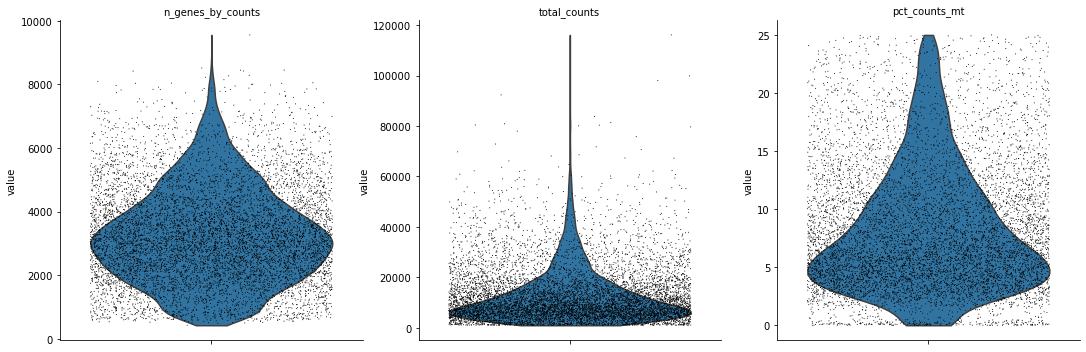

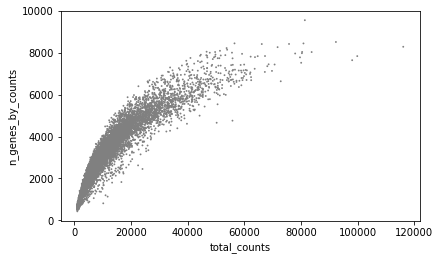

In [69]:
sc.pl.violin(adata_filt, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)
sc.pl.scatter(adata_filt, x='total_counts', y='n_genes_by_counts')

In [70]:
# adata_filt = adata_filt[adata_filt.obs['total_counts'] < 2500, :]
adata_filt = adata_filt[adata_filt.obs.n_genes_by_counts < 6000, :]

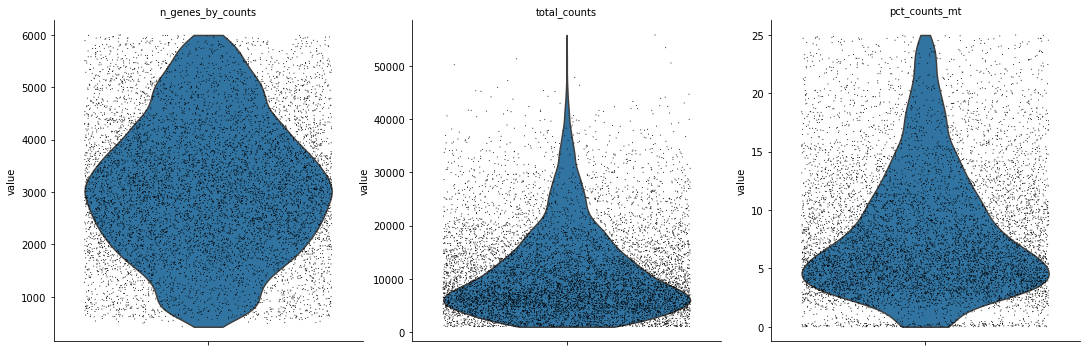

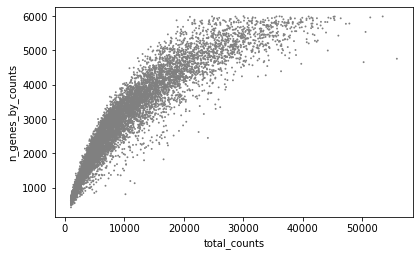

In [71]:
sc.pl.violin(adata_filt, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)
sc.pl.scatter(adata_filt, x='total_counts', y='n_genes_by_counts')

In [76]:
adata_filt = adata_filt[adata_filt.obs['total_counts'] < 20000, :]


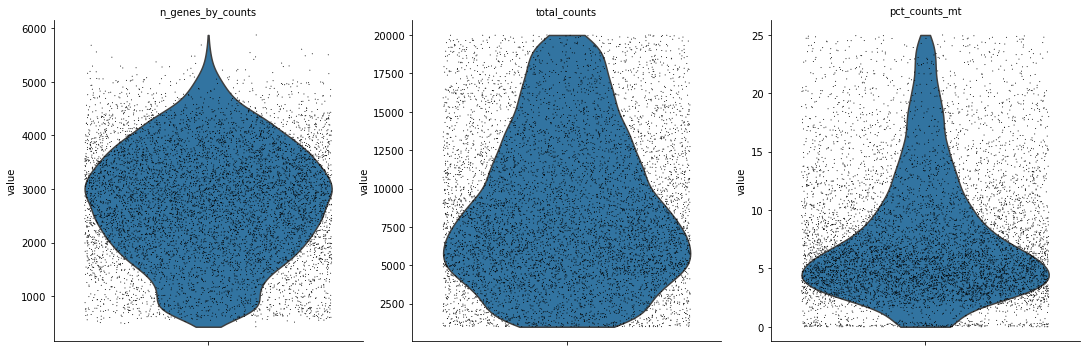

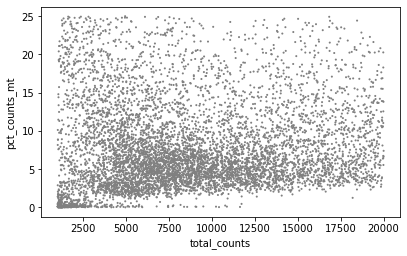

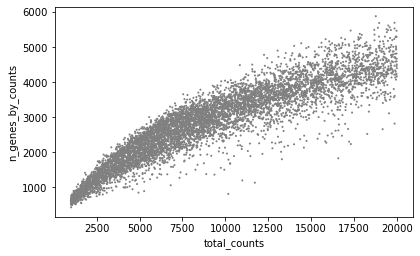

In [77]:
sc.pl.violin(adata_filt, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True, save='filtered_qc_violin_plots.png')

sc.pl.scatter(adata_filt, x='total_counts', y='pct_counts_mt', save='filtered_qc_scatter_plot_pct_mt.png')

sc.pl.scatter(adata_filt, x='total_counts', y='n_genes_by_counts', save='filtered_qc_scatter_plot_n_genes.png')

### 2.3

In [78]:
sc.pp.normalize_per_cell(adata_filt, counts_per_cell_after=1e4) # normalize to 10,000 reads/cell
sc.pp.log1p(adata_filt) # log transform

/opt/conda/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:524: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_n_counts] = counts_per_cell


## Q4

In [79]:
adata_filt.var

,n_cells,n_counts,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
SAMD11,1470,3710.0,False,1470,0.366130,85.492944,3710.0
NOC2L,3514,4846.0,False,3514,0.478239,65.321228,4846.0
KLHL17,417,439.0,False,417,0.043324,95.884733,439.0
PLEKHN1,24,25.0,False,24,0.002467,99.763150,25.0
HES4,2114,7191.0,False,2114,0.709661,79.137472,7191.0
...,...,...,...,...,...,...,...
AC011043.1,5064,10144.0,False,5064,1.001086,50.024672,10144.0
AC007325.4,1805,2477.0,False,1805,0.244449,82.186914,2477.0
AC007325.2,51,52.0,False,51,0.005132,99.496694,52.0
AC004556.3,29,29.0,False,29,0.002862,99.713806,29.0


In [80]:
sc.pp.highly_variable_genes(adata_filt, batch_key="dataset", n_top_genes=500)

In [83]:
highly_variable_genes = adata_filt.var[adata_filt.var['highly_variable']]
print(highly_variable_genes.shape)
highly_variable_genes.head()

(500, 13)


,n_cells,n_counts,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
ISG15,4107,13800.0,False,4107,1.361887,59.469061,13800.0,True,0.950280,2.274368,3.061441,2,False
CTRC,896,27699.0,False,896,2.733544,91.157604,27699.0,True,0.951166,2.870299,2.506351,2,False
CELA2A,220,2155.0,False,220,0.212671,97.828876,2155.0,True,0.261743,1.707167,1.636659,2,False
CELA2B,150,1353.0,False,150,0.133524,98.519688,1353.0,True,0.181989,1.078682,1.709190,1,False
NBL1,2378,4642.0,False,2378,0.458107,76.532123,4642.0,True,0.409371,1.477823,2.142158,1,False


In [84]:
top_5_variable_genes = highly_variable_genes.sort_values('dispersions_norm', ascending=False).head(5)

In [85]:
top_5_variable_genes

,n_cells,n_counts,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
PPY,1148,9090.0,False,1148,0.897069,88.670680,9090.0,True,0.728335,5.231106,11.826794,3,True
NPY,432,6225.0,False,432,0.614329,95.736702,6225.0,True,0.230046,4.499733,10.683679,3,True
AFP,204,2481.0,False,204,0.244844,97.986776,2481.0,True,0.150548,4.023594,9.570572,3,True
SPP1,825,20410.0,False,825,2.014211,91.858285,20410.0,True,0.593203,3.926263,8.550843,3,True
LYZ,666,6956.0,False,666,0.686470,93.427415,6956.0,True,0.500630,4.214282,8.424795,3,True


In [86]:
genes = ["GCG", "TTR",  "IAPP",  "GHRL", "PPY", "COL3A1",
    "CPA1", "CLPS", "REG1A", "CTRB1", "CTRB2", "PRSS2", "CPA2", "KRT19", "INS","SST","CELA3A", "VTCN1"]

adata_var = adata_filt[:, (adata_filt.var.index.isin(genes) | adata_filt.var["highly_variable"])]

In [90]:
adata_var.var

,n_cells,n_counts,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
ISG15,4107,13800.0,False,4107,1.361887,59.469061,13800.0,True,0.950280,2.274368,3.061441,2,False
CTRC,896,27699.0,False,896,2.733544,91.157604,27699.0,True,0.951166,2.870299,2.506351,2,False
CELA2A,220,2155.0,False,220,0.212671,97.828876,2155.0,True,0.261743,1.707167,1.636659,2,False
CELA2B,150,1353.0,False,150,0.133524,98.519688,1353.0,True,0.181989,1.078682,1.709190,1,False
NBL1,2378,4642.0,False,2378,0.458107,76.532123,4642.0,True,0.409371,1.477823,2.142158,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TFF3,3962,25325.0,False,3962,2.499260,60.900030,25325.0,True,1.192683,4.136851,4.897415,3,True
TFF2,312,4815.0,False,312,0.475180,96.920951,4815.0,True,0.556494,3.621370,5.080199,2,False
TFF1,413,3127.0,False,413,0.308596,95.924208,3127.0,True,0.385701,3.366199,5.999853,3,True
COL18A1,1806,5229.0,False,1806,0.516037,82.177045,5229.0,True,0.365643,1.416598,1.684021,1,False


## Q5

In [103]:
sc.pp.pca(adata_var, n_comps=20)

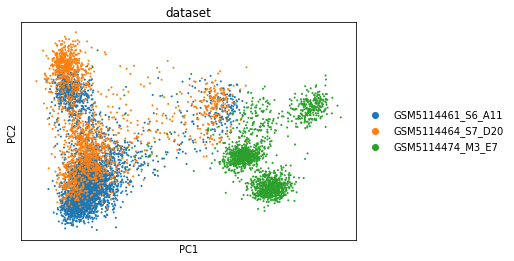

In [104]:
sc.pl.pca(adata_var, color="dataset", save='pre_batch_corrected_pcs.png')

In [105]:
import scanpy.external as sce

sce.pp.harmony_integrate(adata_var, 'dataset', theta=2, nclust=50, max_iter_harmony=10, max_iter_kmeans=10)

2024-05-10 18:18:14,911 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
Computing initial centroids with sklearn.KMeans...
2024-05-10 18:18:18,326 - harmonypy - INFO - sklearn.KMeans initialization complete.
sklearn.KMeans initialization complete.
2024-05-10 18:18:18,803 - harmonypy - INFO - Iteration 1 of 10
Iteration 1 of 10
2024-05-10 18:18:29,006 - harmonypy - INFO - Iteration 2 of 10
Iteration 2 of 10
2024-05-10 18:18:39,201 - harmonypy - INFO - Iteration 3 of 10
Iteration 3 of 10
2024-05-10 18:18:48,004 - harmonypy - INFO - Iteration 4 of 10
Iteration 4 of 10
2024-05-10 18:18:57,506 - harmonypy - INFO - Iteration 5 of 10
Iteration 5 of 10
2024-05-10 18:19:06,704 - harmonypy - INFO - Iteration 6 of 10
Iteration 6 of 10
2024-05-10 18:19:14,602 - harmonypy - INFO - Iteration 7 of 10
Iteration 7 of 10
2024-05-10 18:19:21,710 - harmonypy - INFO - Converged after 7 iterations
Converged after 7 iterations


In [106]:
adata_var.obsm['X_pca'] = adata_var.obsm['X_pca_harmony']

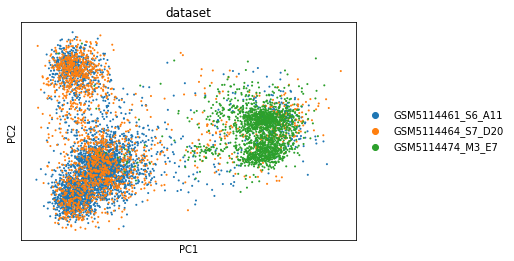

In [107]:
sc.pl.pca(adata_var, color="dataset", save='post_batch_corrected_pcs.png')

In [114]:
sc.logging.print_versions()

-----
anndata     0.9.1
scanpy      1.9.3
-----
PIL                 8.3.1
anyio               NA
attr                21.2.0
babel               2.9.1
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
bottleneck          1.3.2
brotli              NA
certifi             2022.12.07
cffi                1.14.6
chardet             4.0.0
charset_normalizer  2.0.0
cloudpickle         1.6.0
colorama            0.4.6
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.06.2
dateutil            2.8.2
debugpy             1.6.7
decorator           5.0.9
defusedxml          0.7.1
entrypoints         0.3
fastjsonschema      NA
fsspec              2021.07.0
google              NA
h5py                3.3.0
harmonypy           NA
idna                3.1
igraph              0.11.4
ipykernel           6.17.1
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              3.0.1
joblib              1.0.

## Q6

In [115]:
sc.pp.neighbors(adata_var) # computes neighborhood graphs. Needed to run clustering.

sc.tl.leiden(adata_var) # clusters cells based on expression profiles. This is needed to color cells by cluster.

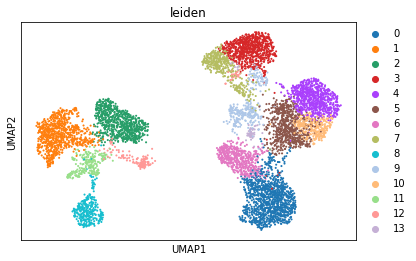

In [120]:
sc.tl.umap(adata_var) # compute UMAP embedding
sc.pl.umap(adata_var, color="leiden", save='umap_cluster.png')

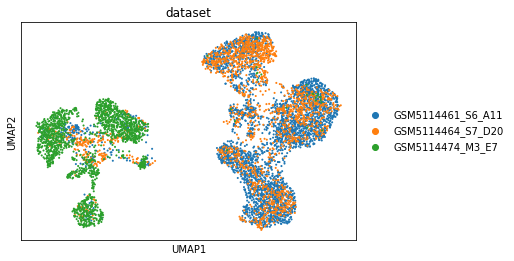

In [121]:
sc.pl.umap(adata_var, color="dataset", save='umap_dataset.png')

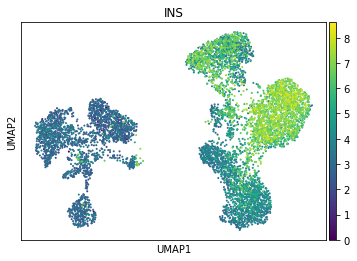

In [124]:
sc.pl.umap(adata_var, color="INS", save='umap_INS.png')

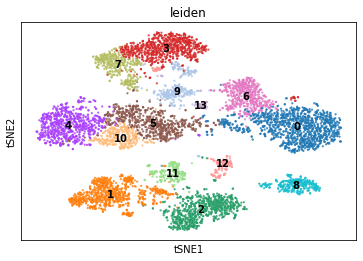

In [122]:
sc.tl.tsne(adata_var)
sc.pl.tsne(adata_var, color=['leiden'], legend_loc='on data', legend_fontsize=10, alpha=0.8, size=20, save='tsne_cluster.png')

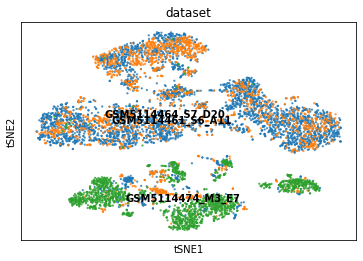

In [123]:
sc.pl.tsne(adata_var, color=['dataset'], legend_loc='on data', legend_fontsize=10, alpha=0.8, size=20, save='tsne_dataset.png')

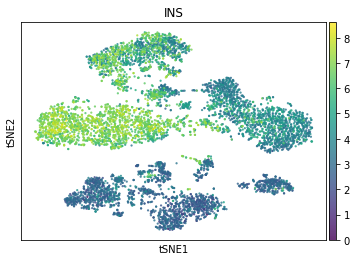

In [125]:
sc.pl.tsne(adata_var, color=['INS'], legend_loc='on data', legend_fontsize=10, alpha=0.8, size=20, save='tsne_INS.png')

## Q7

In [126]:
genes = ["GCG", "TTR",  "IAPP",  "GHRL", "PPY", "COL3A1",
    "CPA1", "CLPS", "REG1A", "CTRB1", "CTRB2", "PRSS2", "CPA2", "KRT19", "INS","SST","CELA3A", "VTCN1"]

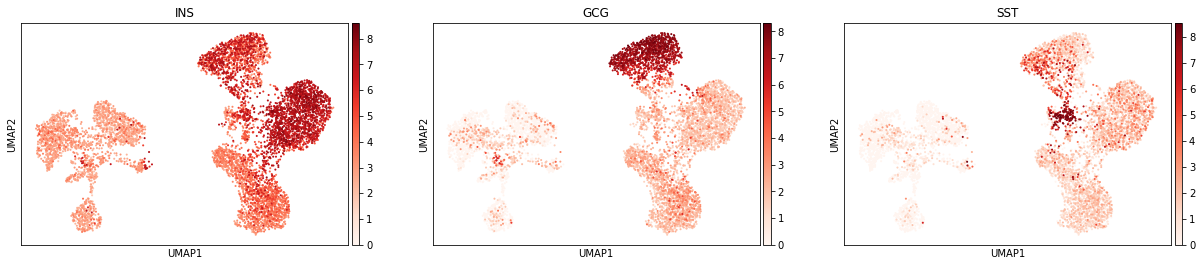

In [130]:
sc.pl.umap(adata_var, color=["INS","GCG","SST"], color_map="Reds", save='umap_geneexp.png')

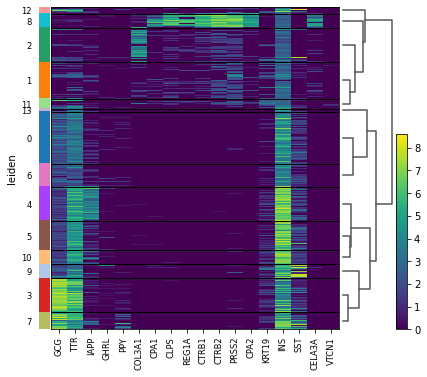

In [128]:
sc.pl.heatmap(adata_var, genes, groupby='leiden', dendrogram=True)

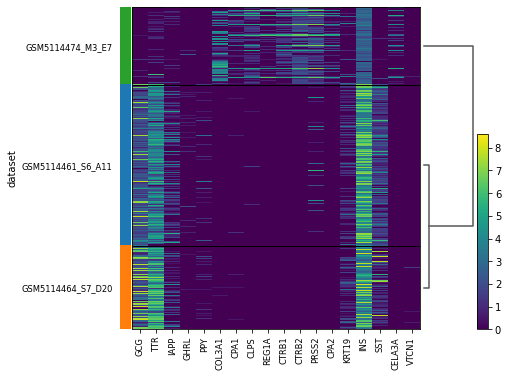

In [129]:
sc.pl.heatmap(adata_var, genes, groupby='dataset', dendrogram=True)

In [132]:
adata_var.obs['leiden']

AAACCTGAGAAGGACA     5
AAACCTGAGTAAGTAC     6
AAACCTGGTCCCGACA     5
AAACCTGTCCTAAGTG     4
AAACCTGTCGCCTGTT     3
                    ..
TTTGGTTTCACGCGGT     8
TTTGGTTTCGACGGAA     2
TTTGTCAGTCTGATTG    12
TTTGTCATCCCGGATG     8
TTTGTCATCGAGAACG     2
Name: leiden, Length: 7141, dtype: category
Categories (14, object): ['0', '1', '2', '3', ..., '10', '11', '12', '13']

In [133]:
for res in [0.05, 0.10, 0.20]:
    sc.tl.leiden(
        adata_var, key_added=f"leiden_res_{res:4.2f}", resolution=res
    )

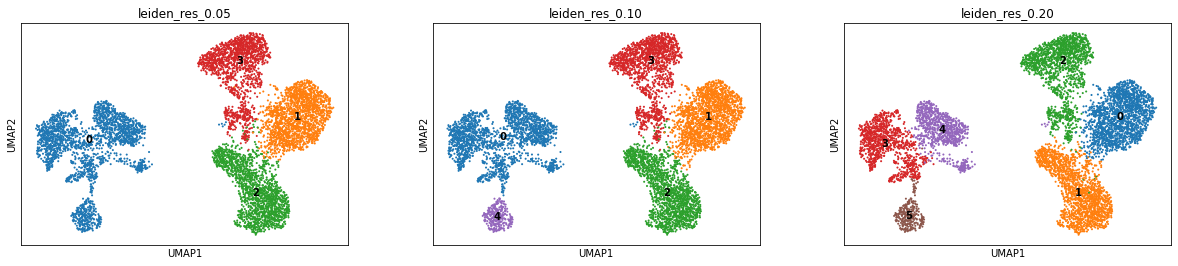

In [134]:
sc.pl.umap(
    adata_var,
    color=["leiden_res_0.05", "leiden_res_0.10", "leiden_res_0.20"],
    legend_loc="on data",
)

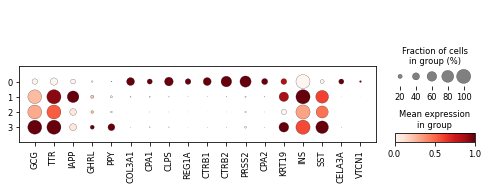

In [136]:
sc.pl.dotplot(adata_var, genes, groupby="leiden_res_0.05", standard_scale="var")

In [137]:
adata_var.obs["cluster_annotations"] = adata_var.obs["leiden_res_0.05"].astype(str).map(
    {
        "0": "Beta Cells",
        "1": "Other",
        "2": "Delta Cells", 
        "3": "Alpha Cells"
    }
)

... storing 'cluster_annotations' as categorical


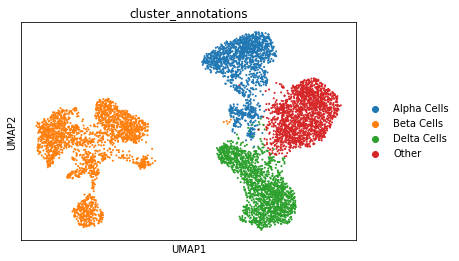

In [138]:
sc.pl.umap(adata_var, color="cluster_annotations", save = 'umap_celltyep.png') 